In [189]:
import pandas as pd
import dask.dataframe as dd
import dask
import time
import numpy as np 
import matplotlib.pyplot as plt 
import pathlib
from pathlib import Path


ruta=r'C:\Users\Alberto\OneDrive\Documents\Big Data\pirple\201805-citibike-tripdata.csv\201805-citibike-tripdata.csv'
df=pd.read_csv(ruta)
dff=dd.from_pandas(df,npartitions=8).compute()

def benchmark(function,function_name):
    start=time.time()
    function()
    end=time.time()
    print('{0} seconds for {1}'.format((end-start),function_name))
    z=end-start
    plt.bar(z,height=z)
    plt.xlim(7,9)

def read_csv_pandas(ruta):
    
    df=pd.read_csv(ruta)
    return df.iloc[1] 

@dask.delayed
def daskdf(ruta):
    df=pd.read_csv(ruta)
    dff=dd.from_pandas(df,npartitions=8)
    dff=dff.compute()
    #df=dd.read_csv(ruta,assume_missing=True,)
    return dff.iloc[1]



ruta1='/Users/Alberto/OneDrive/Documents/Big Data/pirple/201805-citibike-tripdata.csv'
ruta2='/Users/Alberto/OneDrive/Documents/Big Data/pirple/201805-citibike-tripdata.csv'
file1='201805-citibike-tripdata'
file2='single_family_home_values'
suffix='.csv'
path1=Path(ruta1,file1).with_suffix(suffix)
path2=Path(ruta2,file2).with_suffix(suffix)
listafiles=[path1,path2]

output=[]

def concatwith_dask():   
    n_1=[]
    n_2=[]
    for file in listafiles:
        df=daskdf(file)
        df1=daskdf(file)
        n_1.append(df)
        n_2.append(df1)
    n_1=n_1[0]
    n_2=n_2[1]
   
def concatwith_pandas():
    n_1=[]
    n_2=[]
    for file in listafiles:
        df=read_csv_pandas(file)
        df1=read_csv_pandas(file)
        n_1.append(df)
        n_2.append(df1)
    n_1=n_1[0]
    n_2=n_2[1]



8.12136435508728 seconds for pandas
0.0 seconds for dask
8.040061950683594 seconds for pandas
0.0010001659393310547 seconds for dask
8.009002685546875 seconds for pandas
0.0 seconds for dask
8.015005350112915 seconds for pandas
0.010140657424926758 seconds for dask
8.041928052902222 seconds for pandas
0.0 seconds for dask


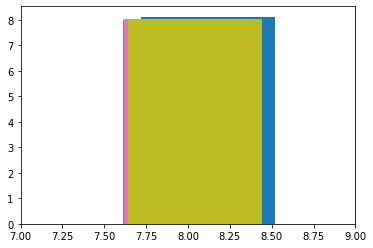

In [190]:
#here we can see how long it takes for different processes. We can spot that the dataframe processing with Dask is almost null in time, while the processing with pandas for such large datasets is much slower.
for i in range(5):    
    benchmark(concatwith_pandas,'pandas')
    benchmark(concatwith_dask,'dask')